In [6]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

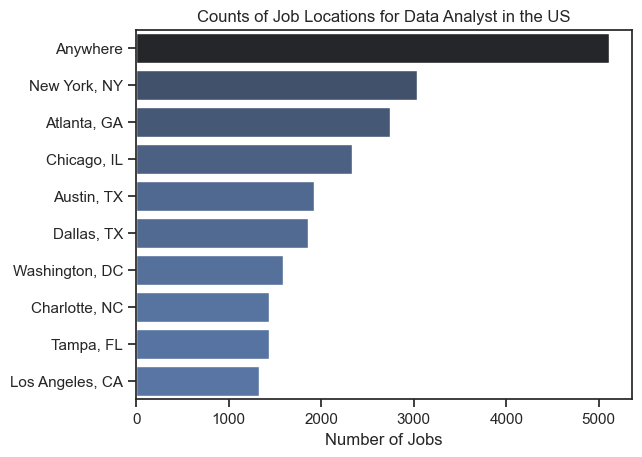

In [15]:
df_plot = df_DA_US ['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x= 'count', y='job_location' , hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

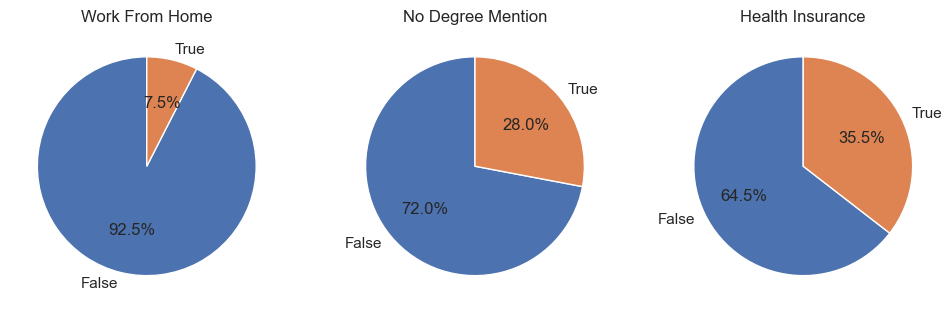

In [18]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12, 5)

dict_colunm = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'No Degree Mention',
    'job_health_insurance':'Health Insurance'
}

for i,(column,title)in enumerate (dict_colunm.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90,autopct='%1.1f%%' ,labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

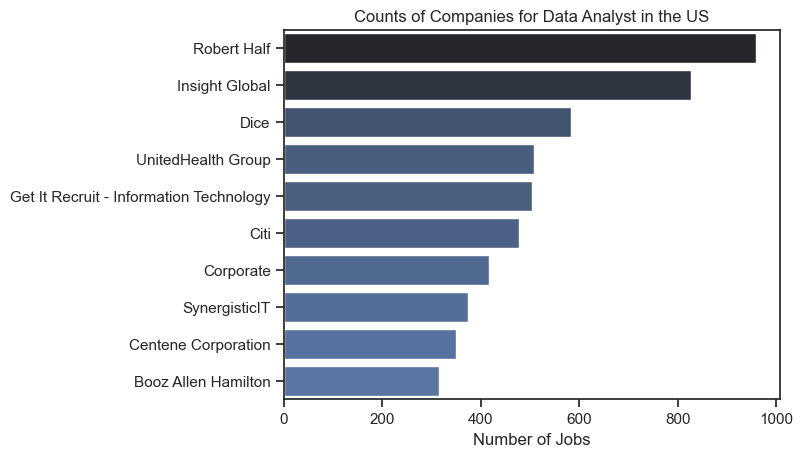

In [19]:
df_plot = df_DA_US ['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x= 'count', y='company_name' , hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()